<font size="6">MEC301 - Métodos Numéricos</font>
# Integración numérica
<br><br><br><br>
Profesor: Francisco Ramírez Cuevas<br>
Fecha: 26 de Septiembre 2022

## Introducción
El cálculo de integrales es fundamental en todos los problemas de ingeniería. Muchos ejemplos tienen relación directa con la estimación de áreas: (a) La superficie de un campo limitado por dos carreteras y un rio, (b) El área transversal de un canal, (c) La fuerza de arrastre sobre un edificio ocacionada por el viento.

<img src="./images/integration_examples.png" width="600px" align= center>

En este capítulo revisaremos dos métodos de integración (1) Formulas de Newton-Cotes para datos tabulados de una función desconocida (2) Integrales para funciones conocidas

## Integración mediante datos tabulados (Fórmulas de Newton-Cotes)
Queremos aproximar la integral de una función $f(x)$ en el intervalo $x\in[a,b]$. 

\begin{equation*}
\int_a^b f(x) dx
\end{equation*}

Sin embargo, en este caso, la función es desconocida y solamente contamos con datos tabulados $x_i$, y $f(x_i)$

Asumamos:
- Intervalo discretizado por $n+1$ puntos $\{x_0, x_1, ... x_i, ...., x_n\}$, con $x_0 = a$ y $x_n = b$
- Subintervalo entre dos puntos $x_{i+1}$ y  $x_i$definido por $h_i =x_{i+1} - x_{i}$.
- Valores $\{f(x_0), f(x_1), ... f(x_i), ...., f(x_n)\}$, conocidos.

Las fórmulas de Newton-Cotes se basan en la aproximación de una función $f(x)$ mediante polinomios generados a partir de los datos tabulados $x_i$ y $f(x_i)$

<img src="./images/Newton_cotes.png" width="600px" align= center>

### Integral de Riemman

El caso más sencillo consiste en aproximar $f(x)$ en el subintervalo $x\in[x_{i+1}, x_i]$ mediante un polinomio de grado 0. La elección más lógica sería $f(x) \approx f(x_i)$ o $f(x) \approx f(x_{i+1})$, ya que estos puntos son conocidos por la tabulación. 


Matemáticamente:

\begin{equation*}
\int_a^b f(x) dx \approx \sum_{i = 0}^{n-1} h_if(x_i)\quad\mathrm{o}\quad\approx\sum_{i = 1}^{n} h_if(x_i),
\end{equation*}

dependiento de si tomamos el valor de la izquierda o derecha del tramo, respectivamente.

En otras palabras, aproximamos el área bajo cada subintervalo mediante un rectángulo. 

<img src="./images/riemann_integral.png" width="400px" align= center>

Mediante series de Taylor podemos caracterizar el error de esta aproximación. Por simplicidad, consideramos un set de $n+1$ puntos igualmente espaciados con $h_i = h = \frac{b-a}{n}$. 

Considerando la integral en subintervalos de ancho $h$, podemos expresar la integral como:

\begin{equation*}
\int_a^b f(x) dx = \sum_{i = 0}^{n-1} \int_{x_i}^{x_{i+1}} f(x) dx,
\end{equation*}

Luego, para cada subintervalo $x\in[x_{i+1}, x_i]$, consideremos la expanción de Taylor de $f(x)$  centrada en $x_i$:

\begin{equation*}
f(x) = f(x_i) + f^{\prime}(x_i)(x-x_i) + \cdots,
\end{equation*}

Reemplazando en cada integral del subintervalo $x\in[x_{i+1}, x_i]$, tenemos:

\begin{align*}
\int_{x_i}^{x_{i+1}}f(x) &= hf(x_i) + \frac{h^2}{2}f^{\prime}(x_i) + O(h^3) \\
&= hf(x_i) + O(h^2)
\end{align*}

Reemplazando en la integral para el intervalo $x\in[a,b]$, tenemos que el error de truncamiento es $nO(h^2)$. 

Finalmente, mediante la relación $h = \frac{b - a}{n}$, deducimos que la aproximación de Riemmann induce un error de truncamiento:
\begin{equation*}
\int_a^b f(x) dx = \sum_{i = 0}^{n-1} hf(x_i) + O(h),
\end{equation*}

### Regla del trapecio (```scipy.integrate.trapezoid```)
Podemos mejorar la aproximación mediante una expansión de segundo orden, $f(x) = f(x_i) + f^{\prime}(x_i)(x-x_i)$, donde la derivada es aproximada por $f^{\prime}(x_i) = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} + O(h_i)$.

Reemplazando en la integral del subintervalo $x\in [x_i, x_{i+1}]$, obtenemos la **regla del trapecio**

\begin{align}
\int_{x_i}^{x_{i+1}}f(x) &= h_if(x_i) + \frac{h_i^2}{2}f^{\prime}(x_i) + O(h^3)\nonumber \\
&= h_i\left[\frac{f(x_{i+1}) + f(x_i)}{2}\right] + O(h_i^3).
\end{align}

Considerando un set de $n+1$ puntos igualmente espaciados en el intervalo $x\in[a,b]$, la **regla del trapecio *extendida o compuesta*** es:

\begin{equation}
\int_a^b f(x) dx = \sum_{i = 0}^{n-1} h\left[\frac{f(x_{i+1}) + f(x_i)}{2}\right] + O(h^2),
\end{equation}
donde $h = \frac{b -a}{n}$

<img src="./images/trapezoid_rule.png" width="400px" align= center>

En ```python``` tenemos la función ```trapezoid``` de la librería ```scipy.integrate```. La función también puede ser llamada como ```trapz``` (alias).

Para utilizar la función debemos indicar los valores de $f(x_i)$ (variable ```yi```) en el primer argumento de la función y los $x_i$ (variable ```xi```) en el segundo:
```python
from scipy.integrate import trapezoid
trapz_int = trapezoid(yi,xi)  # Integral de f(x) mediante regla del trapecio

```

**NOTA** ```scipy.intergrate.trapezoid``` no requiere que los valores de ```xi``` esten igualmente espaciados. Sin embargo, para mejor control del error, es recomendable mantener subintervalos de igual tamaño ($h_i$ constante).

Más información en la [documentación oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html#scipy.integrate.trapezoid)

Por ejemplo, consideremos la integral:

\begin{equation*}
\int_0^\pi \sin(x) dx = 2,
\end{equation*}

considerando un arreglo de puntos igualmente espaciados con $h = \pi/10$:

In [1]:
import numpy as np
import scipy.integrate as spint

a, b = 0, np.pi                            # intervalo de integración
h = (b-a)/10                               # tamaño de subintervalo
xi = np.arange(a,b,h)                      # set de puntos xi
int_trpz = spint.trapezoid(np.sin(xi), xi) # Regla del trapecio

print('Regla trapecio: %.3f' % int_trpz)
print('Error absoluto %.3e' % abs(2 - int_trpz))

Regla trapecio: 1.935
Error absoluto 6.502e-02


El error es menor que $h^2 \approx 9.870\times 10^{-2}$

### Regla de Simpson 1/3 (```scipy.integrate.simpson```)
En términos genrales, lo que hicimos en la regla del trapecio y Riemann es aproximar $f(x)$ por un polinomio y luego integrarlo en cada subintervalo $x\in [x_i, x_{i+1}]$. El error de truncamiento disminuye a medida que aumentamos el orden del polinomio.

La regla de Simpson sigue esta lógica, aunque utilizando polinomios de interpolación de Lagrange en lugar de expansiones de Taylor. 

Por ejemplo, la regla de Simpson 1/3 considera polinomios de Lagrange de segundo orden:

\begin{eqnarray*}L_i(x) &=& f(x_{i-1})\frac{(x - x_i)(x - x_{i+1})}{(x_{i-1} - x_i)(x_{i-1} - x_{i+1})} + f(x_i)\frac{(x - x_{i-1})(x - x_{i+1})}{(x_{i} - x_{i-1})(x_{i} - x_{i+1})}\\[10pt]
&&+ f(x_{i+1})\frac{(x - x_{i-1})(x - x_{i})}{(x_{i+1} - x_{i-1})(x_{i+1} -
x_{i})},\end{eqnarray*}

Al integrar el polinomio en el subintervalo $x\in [x_{i-1}, x_{i+1}]$ determinamos la **regla de Simpson 1/3**:

\begin{equation}
\int_{x_{i-1}}^{x_{i+1}} f(x) dx = \frac{h}{3}\left[f(x_{i-1}) + 4f(x_i) + f(x_{i+1})\right] + O(h^5).
\end{equation}

Notar que el orden del polinomio es 1 grado mayor que en el caso del trapecio. Sin embargo, el error de truncamiento es $O(h^5)$. La prueba de esto se deja como ejercicio.

Para un set de $n+1$ puntos igualmente espaciados en el intervalo $x\in[a,b]$, la **regla de Simpson 1/3 *extendida o compuesta*** es:

\begin{equation}
\int_a^b f(x) dx \approx \frac{h}{3} \left[f(x_0)+4 \left(\sum_{i=1, i\  {\text{impar}}}^{n-1}f(x_i)\right)+2 \left(\sum_{i=2, i\  {\text{par}}}^{n-2}f(x_i)\right)+f(x_n)\right] + O(h^4).
\end{equation}

<img src="./images/simpson_rule.png" width="400px" align= center>

**NOTA** Debido a que la regla de Simpson 1/3 requiere de dos intervalos, el número de puntos debe ser impar.

En ```python``` tenemos la función ```simpson``` de la librería ```scipy.integrate```. La función también puede ser llamada como ```simps``` (alias).

Para utilizar la función debemos indicar los valores de $f(x_i)$ (variable ```yi```) en el primer argumento de la función y los $x_i$ (variable ```xi```) en el segundo:
```python
from scipy.integrate import simpson
int0 = simpson(yi,xi)  #integral de yi mediante regla del trapecio

```

**NOTA** ```scipy.intergrate.simpson``` no requiere que el número de puntos ```xi``` sea impar, ni que esten igualmente espaciados. Sin embargo, para mejor control del error, es recomendable mantener subintervalos de igual tamaño ($h_i$ constante).

**Si el número de puntos ```xi``` es par**, la función ```simpson```, por defecto, considera el promedio entre: 

- Regla de Simpson para los primeros $n-1$ intervalos y trapecio en el último intervalo 
- Regla de Simpson para los últimos $n-1$ intervalos y trapecio en el primer intervalo.

Más información en la [documentación oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html#scipy.integrate.simpson)

Nuevamente, consideremos la integral:

\begin{equation*}
\int_0^\pi \sin(x) dx = 2,
\end{equation*}

considerando un arreglo de 10, 11 y 12 puntos igualmente espaciados:

In [2]:
import numpy as np
import scipy.integrate as spint

# 10 puntos igualmente espaciados
xi = np.linspace(0,np.pi,10)
int_sim10 = spint.simpson(np.sin(xi), xi)

# 11 puntos igualmente espaciados
xi = np.linspace(0,np.pi,11)
int_sim11 = spint.simpson(np.sin(xi), xi)

# 12 puntos igualmente espaciados
xi = np.linspace(0,np.pi,12)
int_sim12 = spint.simpson(np.sin(xi), xi)

In [3]:
print('Regla Simpson 1/3 (10 pts): %.5f' % int_sim10)
print('Error absoluto %.3e\n' % abs(2 - int_sim10))

print('Regla Simpson 1/3 (11 pts): %.5f' % int_sim11)
print('Error absoluto %.3e\n' % abs(2 - int_sim11))

print('Regla Simpson 1/3 (12 pts): %.5f' % int_sim12)
print('Error absoluto %.3e\n' % abs(2 - int_sim12))

Regla Simpson 1/3 (10 pts): 1.99955
Error absoluto 4.513e-04

Regla Simpson 1/3 (11 pts): 2.00011
Error absoluto 1.095e-04

Regla Simpson 1/3 (12 pts): 1.99980
Error absoluto 2.026e-04



En comparación con la integral de 11 puntos, notamos que el error de ```scipy.integrate.simpson``` es mayor cuando usamos 12 puntos.

Esto ocurre debido a que, internamente, ```scipy.integrate.simpson``` considera regla del trapecio para el primer y/o último intervalo impar. La diferencia en el error es el castigo por considerar un método de orden de truncamiento mayor.

## Integración de funciones evaluadas
Las fórmulas de Newton-Cotes son útiles cuando no conocemos la función y solo disponemos de datos tabulados. Si la función a integrar es conocida, las fórmulas de Newton-Cotes aún son válidas. Sin embargo, existen métodos más eficientes para calcular la integral numéricamente.

### Cuadratura Gaussiana (```scipy.integrate.fixed_quad```)
En la regla del trapecio aproximamos la integral por el área bajo una línea contectando dos puntos. Tal como indica la figura de abajo, podemos mejorar este resultado buscando un trapecio que, conectando dos puntos de la curva, minice el error de la aproximación.

<img src="./images/gaussian_quadrature.png" width="550px" align= center>

Considere la forma general para aproximar una integral en el intervalo $x\in[-1,1]$, mediante dos puntos $x_0$ y $x_1$

\begin{equation*}
\int_{-1}^{1} f(x) dx \approx c_0f(x_0) + c_1f(x_1)
\end{equation*}


En el caso de la regla del trapecio tenemos $x_0 = -1$, $x_1 = 1$, y $c_0=c_1=h/2$. Recordemos que esta fórmula fue derivada mediante la aproximación de $f(x)$ por un polinomio de grado 1.

Sin embargo, si liberamos las restricciones para $c_0$, $c_1$, $x_0$, $x_1$, podemos ajustar sus valores para un polinomio de mayor grado. Debido a que tenemos 4 incognitas, podemos generalizar el método para integrar un polinomio de grado 3 de manera exacta.

Mediante la aproximación, $f(x) \approx a_0 + a_1x+ a_2x^2+a_3x^3$, e integrando a ambos lados de la ecuación de cuadratura, derivamos el siguiente sistema de ecuaciones:

\begin{align*}
c_1 + c_2 &= \int_{-1}^{1} 1 dx = 2 \\
c_1x_1 + c_2x_2 &= \int_{-1}^{1} x dx = 0 \\
c_1x_1^2 + c_2x_2^2 &= \int_{-1}^{1} x^2 dx = 2/3 \\
c_1x_1^3 + c_2x_2^3 &= \int_{-1}^{1} x^3 dx = 0,
\end{align*}

cuya solución es $c_0 = c_1 = 1$, $x_0 = -1/\sqrt{3}$, y $x_1 = 1/\sqrt{3}$

El método permite generar una aproximación de orden $O(h^4)$ de la forma:

\begin{equation*}
\int_{-1}^{1} f(x) dx = f\left(-\frac{1}{\sqrt{3}}\right) + f\left(\frac{1}{\sqrt{3}}\right) + O(h^4)
\end{equation*}

Mediante sustitución de variables, podemos generalizar esta fórmula para una integral en un intervalo $x\in[a,b]$:

\begin{equation*}
\int_{a}^{b} f(x) dx \approx \frac{2}{b-a}\left[f\left(\frac{b+a}{2} - \frac{b-a}{2}\frac{1}{\sqrt{3}}\right) + f\left(\frac{b+a}{2} + \frac{b-a}{2}\frac{1}{\sqrt{3}}\right)\right]
\end{equation*}

Mediante un procedimiento similar, podemos generar aproximaciones para polinomios de mayor orden. La siguiente tabla resume la lista de pesos $c_i$ y puntos de evaluación $x_i$, junto a sus errores de truncamiento:
<img src="./images/gaussian_quadrature_table.png" width="700px" align= center>

**NOTA** El error de truncamiento de cuadratura Gaussiana disminuye con el número de puntos de evaluación, $n$, en la forma $O(h^{2n})$.

En ```python``` tenemos la función ```fixed_quad``` para cuadratura Gaussiana, implementada en la libería ```scipy.integrate```. 

Para calcular la cuadratura llamamos la función como ```fixed_quad(f,a,b,n)[0]```, donde: 
- ```f```: función $f(x)$ en formato *callable*
- ```a, b```: intervalo de integración $a$ y $b$
- ```n```: número de puntos o orden $n$ (```n=5``` por defecto). 

```fixed_quad```, por defecto, retorna un *tuple* de dos elementos, de los cuales el primero corresponde al valor de la integral. El término ```[0]``` al final de la función se utiliza para retornar, únicamente, el valor de la integral.

Más información en la [documentación oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.fixed_quad.html#scipy.integrate.fixed_quad)

Por ejemplo, utilizamos cuadratura Gaussiana de 2 puntos para aproximar la integral:

\begin{equation*}
\int_0^\pi \sin(x) dx = 2,
\end{equation*}

In [4]:
from scipy.integrate import fixed_quad

f = lambda x: np.sin(x)  # función tipo callable
a, b = 0, np.pi          # intervalo de integración

fixed_quad(f,a,b,n=2)[0] # cuadratura Gaussiana de 2 puntos

1.9358195746511373



Comparemos el error de la cuadratura Gaussiana con la regla del trapecio a medida que aumentamos el número de puntos de evaluación. 

In [5]:
import numpy as np
import scipy.integrate as spint

N = 10                  # máximo número de puntos de integración
f = lambda x: np.sin(x) # función en formato callable
a, b = 0, np.pi         # intervalo de integración
I0 = 2                  # valor exacto de la integral

Etrapz_arr = [] # generamos una lista vacía para iterar
Egauss_arr = [] # generamos una lista vacía para iterar
for n in range(2,N+1):
    xi = np.linspace(a,b,n)
    
    # error regla del trapecio
    Etrapz = abs(I0 - spint.trapz(f(xi),xi))    
    Etrapz_arr.append(Etrapz)
    
    # error cuadratura de Gauss
    Egauss = abs(I0 - spint.fixed_quad(f,a,b,n=n)[0])
    Egauss_arr.append(Egauss)

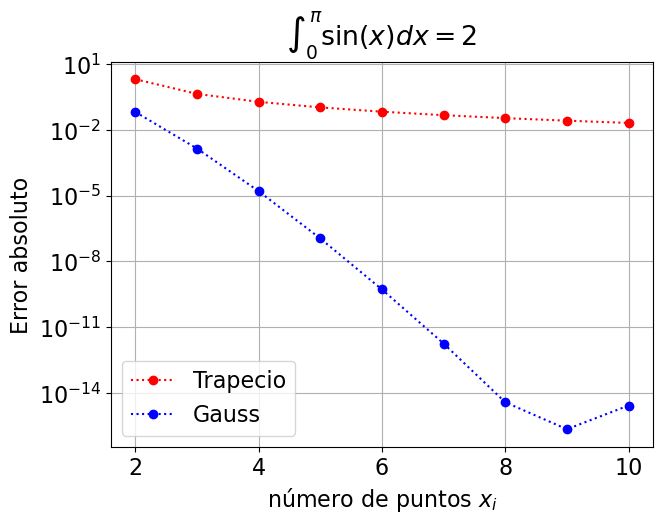

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7, 5))           # Tamaño de figura
plt.rcParams.update({'font.size': 16}) # Tamaño de fuente

plt.plot(list(range(2,N+1)), Etrapz_arr,'o:r', label='Trapecio')
plt.plot(list(range(2,N+1)), Egauss_arr,'o:b', label='Gauss')

# Formateamos los ejes y títulos del gráfico
plt.yscale('log')
plt.xlabel('número de puntos $x_i$')
plt.ylabel('Error absoluto')
plt.title('$\int_0^\pi \sin(x) dx = 2$')
plt.grid()
plt.legend()
plt.show()

### Cuadratura adaptativa (```scipy.integrate.quad```)
Los métodos de cuadratura adaptativa son los más utilizados hoy en dia. Aunque existen diversos tipos, podemos resumir el procedimiento mediante los siguientes pasos:

1. Supongamos que tenemos dos estimaciones $I_1$ y $I_2$ de la integral:
\begin{equation*}
I = \int_a^b f(x) dx,
\end{equation*}
donde $I_1$ corresponde a la aproximación más precisa.

2. Determine el error absoluto $\epsilon = I_1 - I_2$.

3. Si $\epsilon < \tau$, donde $\tau$ es la tolerancia, aceptamos $I_1$ como aproximación de $I$. En caso contrario, subdividimos el intervalo $x\in[a,b]$ en dos subintervalos:
\begin{equation*}
I = \int_a^m f(x) dx + \int_m^b f(x) dx\quad\quad m=(a+b)/2
\end{equation*}
y repetimos el paso (1) para cada integral.

Para calcular las estimaciones $I_1$ y $I_2$ se utiliza algún método de cuadratura estática, como por ejemplo, cuadratura de Gauss.

En ```python``` tenemos la función ```quad``` para cuadratura adaptativa, implementada en la libería ```scipy.integrate```. Esta función se basa en la librería [QUADPACK](https://en.wikipedia.org/wiki/QUADPACK) de FORTRAN. Para evaluar $I_1$ y $I_2$, ```quad``` utiliza una variante de la cuadratura de Gauss, llamada [Gauss–Kronrod](https://en.wikipedia.org/wiki/Gauss%E2%80%93Kronrod_quadrature_formula)

Por defecto, ```quad``` retorna un *tuple* con dos elementos. El primero corresponde al valor de la integral, el segundo al error absoluto de la estimación.

In [7]:
from scipy.integrate import quad

f = lambda x: np.sin(x)  # función tipo callable
a, b = 0, np.pi          # intervalo de integración
print('Valor de la integral = %.5f' % quad(f,a,b)[0])
print('Error absoluto = %.5e'       % quad(f,a,b)[1])

Valor de la integral = 2.00000
Error absoluto = 2.22045e-14


```quad``` también permite determinar integrales con intervalos hacia el infinito.

Por ejemplo, consideremos la integral

\begin{equation*}
\int_{-\infty}^{\infty} e^{-x^2} dx
\end{equation*}

In [8]:
from scipy.integrate import quad

f = lambda x: np.exp(-x**2)  # función tipo callable
a, b = -np.inf, np.inf       # intervalo de integración
print('I = %.5f; E. absoluto = %.5e' % quad(f,a,b))

I = 1.77245; E. absoluto = 1.42026e-08


Mediante los argumentos ```epsabs``` y ```epsrel```, podemos condicionar la tolerancia respecto al error absoluto y relativo, respectivamente:
```python
quad(f,a,b,epsabs=1E-5) # Tolerancia absoluta de 0.00001
quad(f,a,b,epsrel=1E-2) # Tolerancia relativa del 1%
```

Por defecto, ```epsabs=1.49e-08```, y ```epsrel=1.49e-08```.

Más información en la [documentación oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)

## Referencias
- Kong Q., Siauw T., Bayen A. M. **Chapter 21: Numerical Integration** in *[Python Programming and Numerical Methods – A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.00-Interpolation.html)*, 1st Ed., Academic Press, 2021

- Chapra S., Canale R. **Capítulo 21: Fórmula de integración de Newton-Cotes** en *Métodos Numéricos para Ingenieros*, 6ta Ed., McGraw Hill, 2011

- Chapra S., Canale R. **Capítulo 22: Integración de ecuaciones** en *Métodos Numéricos para Ingenieros*, 6ta Ed., McGraw Hill, 2011

- Williams H. P. **Chapter 4: Integration of Functions** in "Numerical Recipes" 3rd Ed, Cambridge University Press, 2007